  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,1.949562,Low Fat,-1.191986,Snack Foods,-0.536555,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,-0.929146,reg,-0.547893,Dairy,-0.868937,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,0.527550,Low Fat,0.728220,Others,1.629848,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,-1.156899,Low Fat,-1.028712,Snack Foods,0.226697,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,-0.420458,Regular,1.125251,Dairy,1.508110,OUT027,1985,Medium,Tier 3,Supermarket Type3


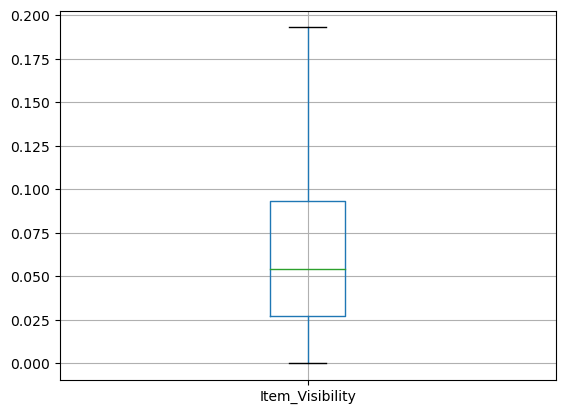

In [183]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from category_encoders import MEstimateEncoder
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

%matplotlib inline 

TestData = pd.read_csv('/kaggle/input/bigmart/Test.csv')
print(TestData.head() ) 
 
print("Null values")
print(TestData.isnull().sum()) 

Mode1=TestData["Item_Weight"].mode().values[0] 
Mode2=TestData["Outlet_Size"].mode().values[0]
print("Mode of Item Weight" , Mode1 , sep=" ")
print("Mode of Outlet Size" , Mode2 , sep=" ")
print('\n\n')

TestData["Item_Weight"].replace(np.nan,Mode1,inplace=True)

TestData["Outlet_Size"].replace(np.nan,Mode2,inplace=True)

print(TestData.isnull().sum());

# Removing Duplicates 
print("#########")
TestData.drop_duplicates(inplace=True)
duplicate=TestData.duplicated()

print("Duplicates = ", duplicate.sum(), sep=' ')

# Boxplot
# Data.boxplot(column=["Item_MRP"]) # No Outliers in Item_MRP 
#Data.boxplot(column=["Item_Visibility"]) # There are some Outliers 
# Removing Outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR= Q3 - Q1 
    lower_range= Q1- (1.5*IQR)
    Upper_range= Q3+ (1.5*IQR)
    return lower_range,Upper_range 
lowVis, highVis =remove_outlier(TestData['Item_Visibility'])
TestData['Item_Visibility']=np.where(TestData['Item_Visibility']>highVis,highVis,TestData['Item_Visibility'])
TestData['Item_Visibility']=np.where(TestData['Item_Visibility']<lowVis,lowVis,TestData['Item_Visibility'])
TestData.boxplot(column=["Item_Visibility"]) # Outliers are now Removed 




 # Normalizing and Scalling ( For Numerical Data Only)

Std_Scale= StandardScaler()
Std_Scale

TestData['Item_Visibility']=Std_Scale.fit_transform(TestData[['Item_Visibility']])
TestData['Item_MRP']=Std_Scale.fit_transform(TestData[['Item_MRP']])
TestData['Item_Weight']=Std_Scale.fit_transform(TestData[['Item_Weight']])

# show Data
print("Data after Normallizing and Scalling ")
TestData.head()


In [184]:
# Data Visualization`
TestData.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

<Axes: >

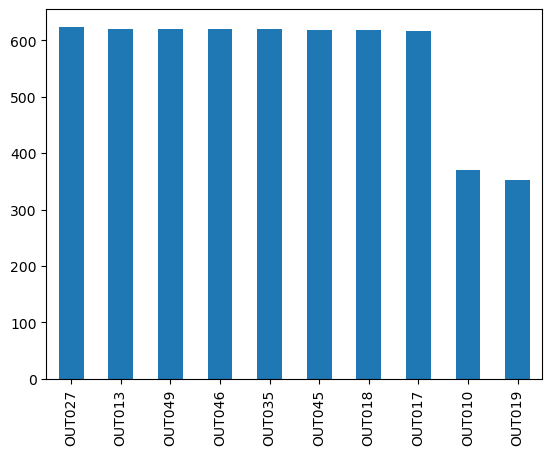

In [185]:
TestData['Outlet_Identifier'].value_counts().plot.bar()

In [186]:
TestData.isnull().sum() 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Converting Categorical To Numerical**

In [187]:
TestData.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [189]:

from sklearn.preprocessing import LabelEncoder
# Create an instance of the LabelEncoder class
le = LabelEncoder()
# Fit the LabelEncoder to the categorical variable
TestData["Item_Type"] = le.fit_transform(TestData["Item_Type"])
TestData["Item_Fat_Content"] = le.fit_transform(TestData["Item_Fat_Content"])
TestData["Item_Identifier"] = le.fit_transform(TestData["Item_Identifier"])
TestData["Outlet_Identifier"] = le.fit_transform(TestData["Outlet_Identifier"])
TestData["Outlet_Location_Type"] = le.fit_transform(TestData["Outlet_Location_Type"])
TestData["Outlet_Type"] = le.fit_transform(TestData["Outlet_Type"])
TestData["Outlet_Size"] = le.fit_transform(TestData["Outlet_Size"])


# Transform the categorical variable into a new variable with encoded values
TestData
TestData.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object